# Data Mining (2CSDE71)
## Name :- Harsh Pansuriya
## Roll No. :- 21BCE176
## Date :- 22th March, 2024
## Prac. No :- 7

#### Aim:-
Identify the frequent patterns and generate strong association rule from the frequent pattern for the following data set (using Apriori and any improved version of Apriori). Keep minimum 50% support and 40% confidence.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
from sklearn.preprocessing import LabelEncoder
import itertools

In [2]:
columns = ["Tid","ItemsBought"]
# data=[
#     [10,["Beer","Nuts","Diaper"]],
#     [20,["Beer","Coffee","Diaper"]],
#     [30,["Beer","Diaper","Eggs"]],
#     [40,["Nuts","Eggs","Milk"]],
#     [50,["Nuts","Coffee","Diaper","Eggs","Milk"]]
# ]
# data_df = pd.DataFrame(data,columns=columns)
# print(data_df)

data = [
    [1,["i1","i2","i5"]],
    [2,["i2","i4"]],
    [3,["i2","i3"]],
    [4,["i1","i2","i4"]],
    [5,["i1","i3"]],
    [6,["i2","i3"]],
    [7,["i1","i3"]],
    [8,["i1","i2","i3","i5"]],
    [9,["i1","i2","i3"]]
]
data_df = pd.DataFrame(data,columns=columns)
print(data_df)

   Tid       ItemsBought
0    1      [i1, i2, i5]
1    2          [i2, i4]
2    3          [i2, i3]
3    4      [i1, i2, i4]
4    5          [i1, i3]
5    6          [i2, i3]
6    7          [i1, i3]
7    8  [i1, i2, i3, i5]
8    9      [i1, i2, i3]


In [3]:
unique_items = []
for i in data:
    for q in i[1]:
        if(q not in unique_items):
            unique_items.append(q)
unique_items = sorted(unique_items)
print(unique_items)

['i1', 'i2', 'i3', 'i4', 'i5']


In [4]:
min_support = 0.2
min_support_count = int(math.ceil(min_support*len(data_df)))
print(min_support_count)

2


In [5]:
from collections import Counter

c = Counter()
for i in unique_items:
    for d in data:
        if(i in d[1]):
            c[i]+=1
print("C1:")
for i in c:
    print(str([i])+": "+str(c[i]))
print()

l = Counter()
for i in c:
    if(c[i] >= min_support_count):
        l[frozenset([i])]+=c[i]
print("L1:")
for i in l:
    print(str(list(i))+": "+str(l[i]))
print()

pl = l
pos = 1
for count in range (2,1000):
    nc = set()
    temp = list(pl)
    temp = sorted(temp)
    # print(temp)
    for i in range(0,len(temp)):
        for j in range(i+1,len(temp)):
            # Convert frozenset to list and then check if last elements are different
            if list(temp[i])[:-1] == list(temp[j])[:-1] and list(temp[i])[-1] != list(temp[j])[-1]:
                # Take union and ensure it's sorted
                t = sorted(set(temp[i]).union(set(temp[j])))
                if len(t) == count:
                    nc.add(tuple(t))
    nc = list(nc)
    nc = sorted(nc)
    # print(nc)
    c = Counter()
    for i in nc:
        c[i] = 0
        for q in data:
            temp = set(q[1])
            if(set(i).issubset(temp)):
                c[i]+=1
    if(len(c) == 0):
        break
    print("C"+str(count)+":")
    for i in c:
        print(str(list(i))+": "+str(c[i]))
    print()
    
    l = Counter()
    for i in c:
        if(c[i] >= min_support_count):
            l[i]+=c[i]
    if(len(l) == 0):
        break
    print("L"+str(count)+":")
    for i in l:
        print(str(list(i))+": "+str(l[i]))
    print()
    
    pl = l
    pos = count

print("Result: ")
print("L"+str(pos)+":")
for i in pl:
    print(str(list(i))+": "+str(pl[i]))
print()

C1:
['i1']: 6
['i2']: 7
['i3']: 6
['i4']: 2
['i5']: 2

L1:
['i1']: 6
['i2']: 7
['i3']: 6
['i4']: 2
['i5']: 2

C2:
['i1', 'i2']: 4
['i1', 'i3']: 4
['i1', 'i4']: 1
['i1', 'i5']: 2
['i2', 'i3']: 4
['i2', 'i4']: 2
['i2', 'i5']: 2
['i3', 'i4']: 0
['i3', 'i5']: 1
['i4', 'i5']: 0

L2:
['i1', 'i2']: 4
['i1', 'i3']: 4
['i1', 'i5']: 2
['i2', 'i3']: 4
['i2', 'i4']: 2
['i2', 'i5']: 2

C3:
['i1', 'i2', 'i3']: 2
['i1', 'i2', 'i5']: 2
['i1', 'i3', 'i5']: 1
['i2', 'i3', 'i4']: 0
['i2', 'i3', 'i5']: 1
['i2', 'i4', 'i5']: 0

L3:
['i1', 'i2', 'i3']: 2
['i1', 'i2', 'i5']: 2

C4:
['i1', 'i2', 'i3', 'i5']: 1

Result: 
L3:
['i1', 'i2', 'i3']: 2
['i1', 'i2', 'i5']: 2



In [6]:
from itertools import combinations
for l in pl:
    c = [frozenset(q) for q in combinations(l,len(l)-1)]
    print(c)
    mmax = 0
    for a in c:
        b = frozenset(l)-a
        ab = l
        sab = 0
        sa = 0
        sb = 0
        for q in data:
            temp = set(q[1])
            if(set(a).issubset(temp)):
                sa+=1
            if(set(b).issubset(temp)):
                sb+=1
            if(set(ab).issubset(temp)):
                sab+=1
        temp = sab/sa*100
        if(temp > mmax):
            mmax = temp
        temp = sab/sb*100
        if(temp > mmax):
            mmax = temp
        print(str(list(a))+" -> "+str(list(b))+" = "+str(sab/sa*100)+"%")
        print(str(list(b))+" -> "+str(list(a))+" = "+str(sab/sb*100)+"%")
    curr = 1
    print("choosing:", end=' ')
    for a in c:
        b = frozenset(l)-a
        ab = l
        sab = 0
        sa = 0
        sb = 0
        for q in data:
            temp = set(q[1])
            if(set(a).issubset(temp)):
                sa+=1
            if(set(b).issubset(temp)):
                sb+=1
            if(set(ab).issubset(temp)):
                sab+=1
        temp = sab/sa*100
        if(temp == mmax):
            print(curr, end = ' ')
        curr += 1
        temp = sab/sb*100
        if(temp == mmax):
            print(curr, end = ' ')
        curr += 1
    print()
    print()

[frozenset({'i2', 'i1'}), frozenset({'i3', 'i1'}), frozenset({'i2', 'i3'})]
['i2', 'i1'] -> ['i3'] = 50.0%
['i3'] -> ['i2', 'i1'] = 33.33333333333333%
['i3', 'i1'] -> ['i2'] = 50.0%
['i2'] -> ['i3', 'i1'] = 28.57142857142857%
['i2', 'i3'] -> ['i1'] = 50.0%
['i1'] -> ['i2', 'i3'] = 33.33333333333333%
choosing: 1 3 5 

[frozenset({'i2', 'i1'}), frozenset({'i5', 'i1'}), frozenset({'i5', 'i2'})]
['i2', 'i1'] -> ['i5'] = 50.0%
['i5'] -> ['i2', 'i1'] = 100.0%
['i5', 'i1'] -> ['i2'] = 100.0%
['i2'] -> ['i5', 'i1'] = 28.57142857142857%
['i5', 'i2'] -> ['i1'] = 100.0%
['i1'] -> ['i5', 'i2'] = 33.33333333333333%
choosing: 2 3 5 



### Use better algorithm then apriori -> FP growth

In [7]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [8]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [9]:
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,1.0,(Kidney Beans)
1,0.8,(Eggs)
2,0.6,(Yogurt)
3,0.6,(Onion)
4,0.6,(Milk)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Kidney Beans, Yogurt)"
7,0.6,"(Onion, Eggs)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Onion, Eggs)"


## Comparison of FP Growth and Apriori algorithm

In [10]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [11]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [12]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"


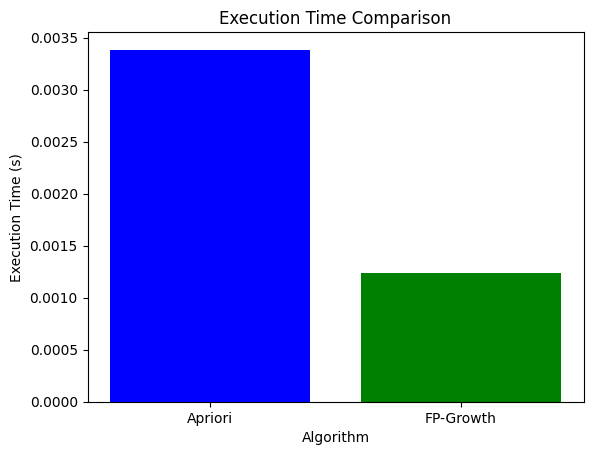

In [13]:
import time
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth
import matplotlib.pyplot as plt

# Sample dataset
dataset = [
    ['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
    ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
    ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
    ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
    ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']
]

# Convert dataset to DataFrame
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# List to store execution times
execution_times = []

# Measure execution time for Apriori algorithm
start_time = time.time()
apriori(df, min_support=0.6, use_colnames=True)
execution_time_apriori = time.time() - start_time
execution_times.append(execution_time_apriori)

# Measure execution time for FP-Growth algorithm
start_time = time.time()
fpgrowth(df, min_support=0.6, use_colnames=True)
execution_time_fpgrowth = time.time() - start_time
execution_times.append(execution_time_fpgrowth)

# Plotting the execution time comparison
plt.bar(['Apriori', 'FP-Growth'], execution_times, color=['blue', 'green'])
plt.xlabel('Algorithm')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time Comparison')
plt.show()


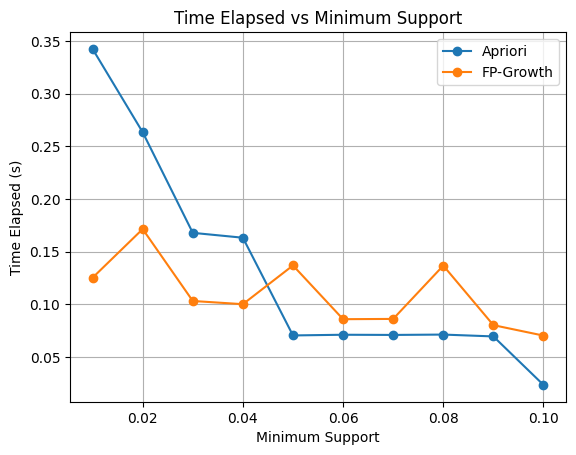

In [14]:
import time
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth
import matplotlib.pyplot as plt
import numpy as np

# Load customer dataset from CSV
with open('/Users/harsh/Documents/DM_prac/Database/frequent_pattern_analysis.csv', 'r') as file:
    lines = file.readlines()

# Split each line into a list of items
transactions = [line.strip().split(',') for line in lines]

# Convert transactions to one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
onehot_df = pd.DataFrame(te_ary, columns=te.columns_)

# Define range of minimum support values
min_support_values = np.arange(0.01, 0.11, 0.01)

# Lists to store execution times for Apriori and FP-Growth algorithms
execution_times_apriori = []
execution_times_fpgrowth = []

# Measure execution times for each minimum support value
for min_support in min_support_values:
    # Measure execution time for Apriori algorithm
    start_time = time.time()
    apriori(onehot_df, min_support=min_support, use_colnames=True)
    execution_times_apriori.append(time.time() - start_time)

    # Measure execution time for FP-Growth algorithm
    start_time = time.time()
    fpgrowth(onehot_df, min_support=min_support, use_colnames=True)
    execution_times_fpgrowth.append(time.time() - start_time)

# Plotting the time elapsed vs minimum support
plt.plot(min_support_values, execution_times_apriori, label='Apriori', marker='o')
plt.plot(min_support_values, execution_times_fpgrowth, label='FP-Growth', marker='o')
plt.xlabel('Minimum Support')
plt.ylabel('Time Elapsed (s)')
plt.title('Time Elapsed vs Minimum Support')
plt.legend()
plt.grid(True)
plt.show()
